In [1]:
from roms_tools import Grid

### Creating a grid from scratch

The first step is choosing the domain size, location, resolution, and topography options. Do this by creating an instance of the `Grid` class:

In [2]:
grid = Grid(
    nx=100,                     # number of points in the x-direction (not including 2 boundary cells on either end)
    ny=100,                     # number of points in the y-direction (not including 2 boundary cells on either end)
    size_x=1800,                # size of the domain in the x-direction (in km)
    size_y=2400,                # size of the domain in the y-direction (in km)
    center_lon=-10,             # longitude of the center of the domain
    center_lat=61,              # latitude of the center of the domain
    rot=20,                     # rotation of the grid's x-direction from lines of constant longitude, with positive values being a counter-clockwise rotation
    topography_source='etopo5', # data source to use for the topography
    smooth_factor=8,            # smoothing factor used in the global Gaussian smoothing of the topography, default: 8
    hmin=5,                     # minimum ocean depth (in m), default: 5
    rmax=0.2,                   # maximum slope parameter (in m), default: 0.2
)

To visualize the grid we have just created, use the `.plot` method:

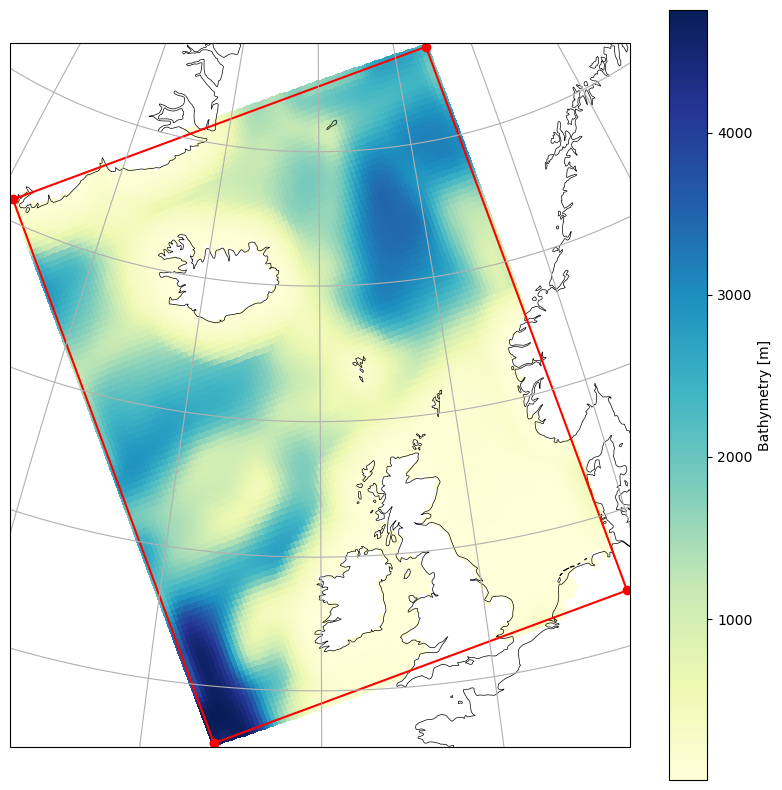

In [3]:
grid.plot(bathymetry=True)

To see the values of the grid variables you can examine the `xarray.Dataset` object returned by the `.ds` property

In [4]:
grid.ds

<xarray.Dataset> Size: 749kB
Dimensions:   (eta_rho: 102, xi_rho: 102)
Coordinates:
    lat_rho   (eta_rho, xi_rho) float64 83kB 47.84 47.91 47.97 ... 73.51 73.53
    lon_rho   (eta_rho, xi_rho) float64 83kB 344.0 344.3 344.5 ... 3.644 4.207
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    angle     (eta_rho, xi_rho) float64 83kB 0.4177 0.4177 ... 0.1146 0.1146
    f         (eta_rho, xi_rho) float64 83kB 0.0001078 0.0001079 ... 0.0001395
    pm        (eta_rho, xi_rho) float64 83kB 4.209e-05 4.208e-05 ... 4.209e-05
    pn        (eta_rho, xi_rho) float64 83kB 5.592e-05 5.592e-05 ... 5.592e-05
    tra_lon   int64 8B -10
    tra_lat   int64 8B 61
    rotate    int64 8B 20
    hraw      (eta_rho, xi_rho) float64 83kB 4.642e+03 4.59e+03 ... 2.331e+03
    mask_rho  (eta_rho, xi_rho) int64 83kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    h         (eta_rho, xi_rho) float64 83kB 4.639e+03 4.639e+03 ... 2.291e+03
Attributes:
    Type:               ROMS grid produced by roms-tools
    size_x:             1800
    size_y:             2400
    topography_source:  etopo5
    smooth_factor:      8
    hmin:               5
    rmax:               0.2

Once we are happy with our grid, we can save it as a netCDF file via the `.save` method:

In [5]:
grid.save('grids/my_new_roms_grid.nc')

### Creating a grid from an existing file

We can also create a grid from an existing file:

In [9]:
the_same_grid = Grid.from_file('grids/my_new_roms_grid.nc')

Maybe we have changed our mind about how to smooth the topography. We can update the topography as follows:

In [10]:
the_same_grid.add_topography_and_mask(
    topography_source='etopo5', # data source to use for the topography
    smooth_factor=16,           # smoothing factor used in the global Gaussian smoothing of the topography, default: 8
    hmin=5,                     # minimum ocean depth (in m), default: 5
    rmax=0.2,                   # maximum slope parameter (in m), default: 0.2
)

We still have the same grid, but now with a smoother topography.

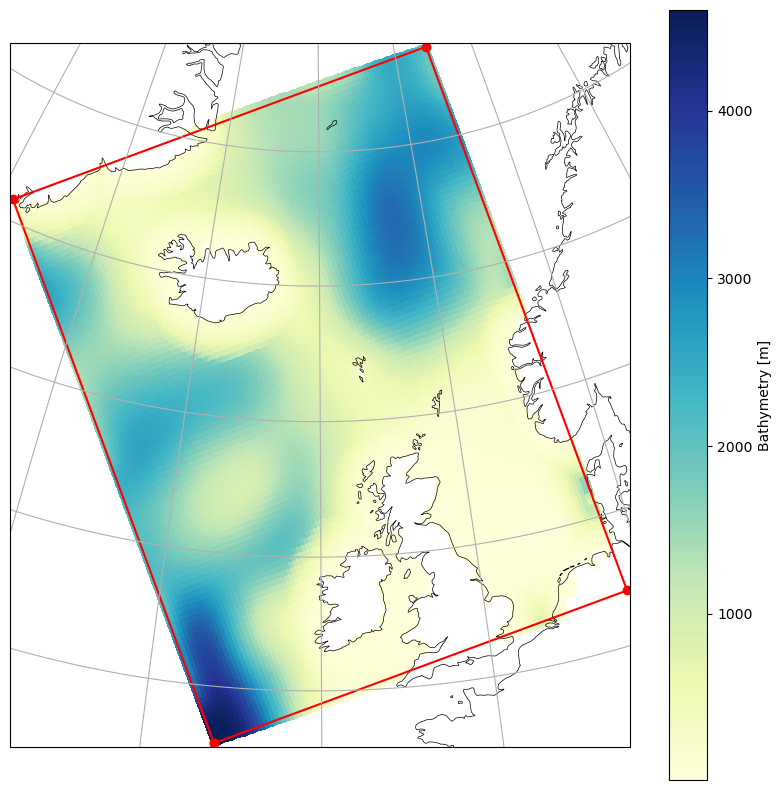

In [11]:
the_same_grid.plot(bathymetry=True)

In [13]:
the_same_grid.save('grids/grid_with_smoother_topography.nc')